In [ ]:
## Notebook env: brian_script_env (R kernel)
## this notebook remakes some of the figures in the TCGA dataset analysis for better aesthetics

In [1]:
library(ggplot2)
library(ggrepel)
library(ggpubr)
library(sinaplot)
library(ggforce)
library(dplyr)

Loading required package: plyr


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Remaking z_plot_comparison_filtered_genes_2000DEGs.pdf

In [2]:
## value column is z-score
z_melt_ordered_q75 = read.csv('/home/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q25_q75_original/z_melt_ordered_q25_q75.csv')
z_melt_ordered_q90 = read.csv('/home/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q10_q90_original/z_melt_ordered_q10_q90.csv')
z_melt_ordered = bind_rows('q25 vs q75' = z_melt_ordered_q75, 'q10 vs q90' = z_melt_ordered_q90, .id = 'group')
z_melt_ordered = z_melt_ordered %>% select(-X)
z_melt_ordered$group <- factor(z_melt_ordered$group, levels = c('q25 vs q75', 'q10 vs q90'))

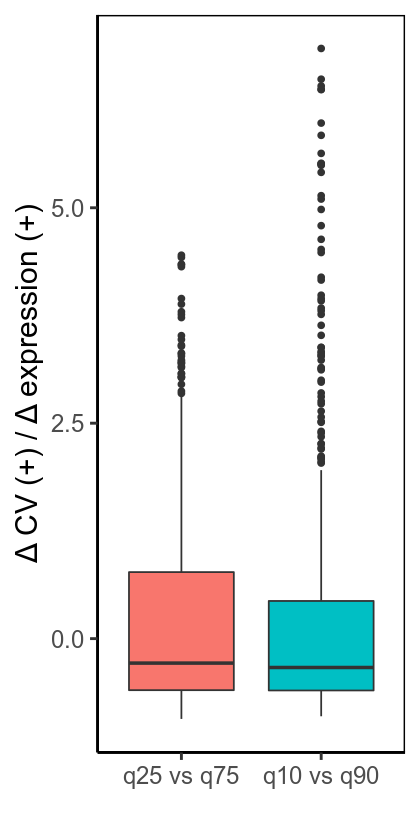

In [3]:
options(repr.plot.width=3.5, repr.plot.height=7)

ggplot(z_melt_ordered, mapping = aes(x = group, y = value, fill = group)) + 
geom_boxplot() + scale_fill_discrete() + 
theme_classic(18) +  xlab('') + ylab('\u0394 CV (+) / \u0394 expression (+)') +
theme (legend.position = "none", text=element_text(size=18,  family="Helvetica")) +
theme(panel.background = element_rect(colour = "black"), panel.grid.minor = element_blank())



In [4]:
z_melt_ordered_filtered = z_melt_ordered[z_melt_ordered$value > 2.5,]

Warning message:
“ggrepel: 73 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


List of 2
 $ panel.background:List of 5
  ..$ fill         : NULL
  ..$ colour       : chr "black"
  ..$ size         : NULL
  ..$ linetype     : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ panel.grid.minor: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

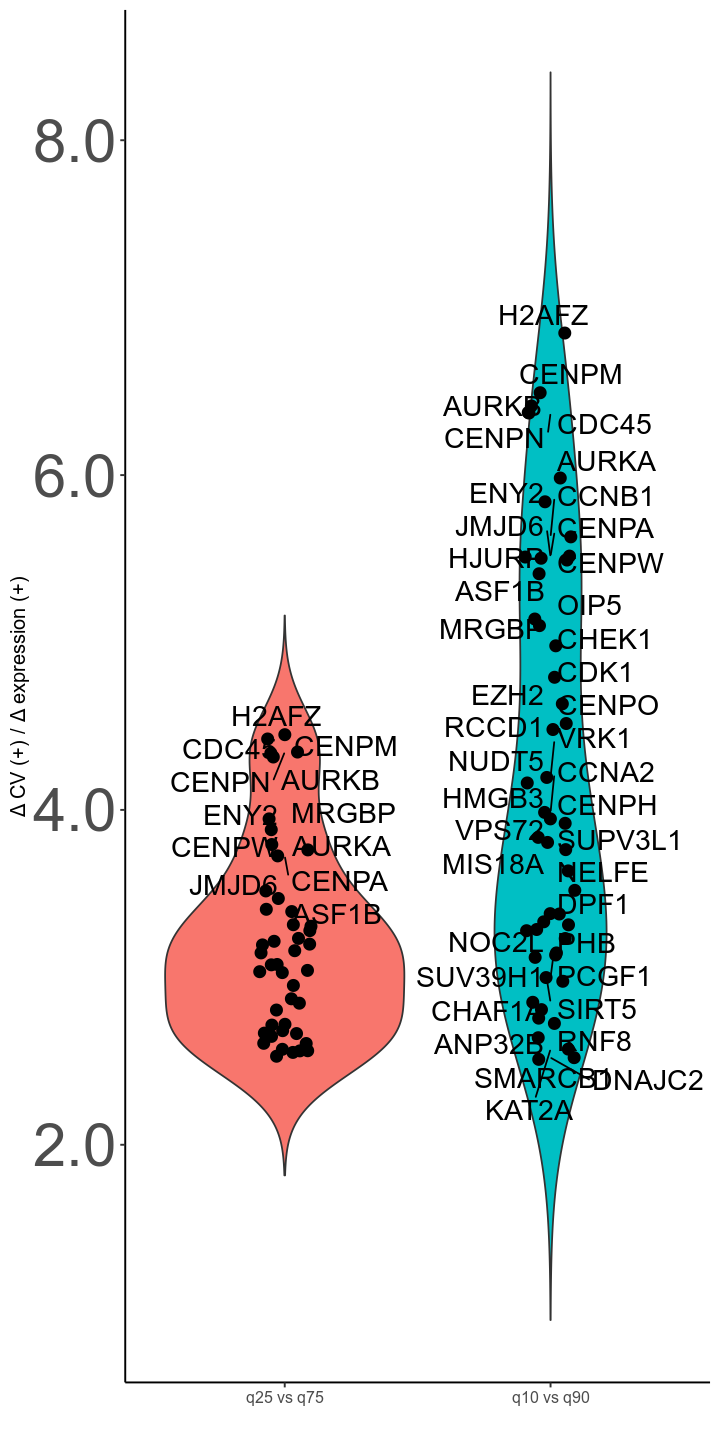

In [5]:
options(repr.plot.width = 6, repr.plot.height = 12)

ggplot(z_melt_ordered_filtered, mapping = aes(x = group, y = value, fill = group)) + 
geom_violin(trim = F) +
geom_jitter(width = 0.1,size = 3) +
  geom_text_repel(data=z_melt_ordered_filtered,
            aes(group,value,label=Chromatin.factor.name), size = 6) + scale_fill_discrete() + 
theme_classic(12) +  xlab('') + ylab('\u0394 CV (+) / \u0394 expression (+)') + scale_y_continuous(
  labels = scales::number_format(accuracy = 0.1)) +
theme (legend.position = "none", axis.text.y=element_text(size=36,  family="Helvetica"))
theme(panel.background = element_rect(colour = "black"), panel.grid.minor = element_blank())


In [6]:
intersected_genes_z2.5 = intersect(z_melt_ordered_filtered[z_melt_ordered_filtered$group == 'q25 vs q75', 'Chromatin.factor.name'], z_melt_ordered_filtered[z_melt_ordered_filtered$group == 'q10 vs q90', 'Chromatin.factor.name'])
saveRDS(intersected_genes_z2.5, '/home/ssobti/projects/heterogeneity_brian/output_data/intersected_CO_genes.rds')

In [35]:
length(intersected_genes_z2.5)

[1] 41

In [90]:
intersected_genes = data.frame(intersected_genes_z2.5[1:20], c(intersected_genes_z2.5[21:38], intersected_genes_z2.5[c(41,40)]))
colnames(intersected_genes) = NULL

In [91]:
intersected_genes

[,1]  [,2]   
1  H2AFZ CCNB1  
2  CDC45 CDK1   
3  CENPN HMGB3  
4  CENPM MIS18A 
5  AURKB EZH2   
6  ENY2  CCNA2  
7  MRGBP SUPV3L1
8  CENPW VRK1   
9  AURKA RUVBL1 
10 CENPA ANP32B 
11 JMJD6 RNF8   
12 ASF1B PRMT1  
13 NUDT5 SUV39H1
14 OIP5  CENPO  
15 CENPH HMGN3  
16 HMGA1 PCGF1  
17 NELFE VPS72  
18 CHEK1 FBL    
19 RCCD1 CENPU  
20 HJURP NOC2L

In [36]:
intersected_genes_z2.5

[1] "H2AFZ"   "CDC45"   "CENPN"   "CENPM"   "AURKB"   "ENY2"    "MRGBP"  
 [8] "CENPW"   "AURKA"   "CENPA"   "JMJD6"   "ASF1B"   "NUDT5"   "OIP5"   
[15] "CENPH"   "HMGA1"   "NELFE"   "CHEK1"   "RCCD1"   "HJURP"   "CCNB1"  
[22] "CDK1"    "HMGB3"   "MIS18A"  "EZH2"    "CCNA2"   "SUPV3L1" "VRK1"   
[29] "RUVBL1"  "ANP32B"  "RNF8"    "PRMT1"   "SUV39H1" "CENPO"   "HMGN3"  
[36] "PCGF1"   "VPS72"   "FBL"     "CHAF1B"  "NOC2L"   "CENPU"

In [31]:
length(z_melt_ordered_filtered[z_melt_ordered_filtered$group == 'q25 vs q75', 'Chromatin.factor.name'])

[1] 45

In [32]:
length(z_melt_ordered_filtered[z_melt_ordered_filtered$group == 'q10 vs q90', 'Chromatin.factor.name'])

[1] 50

In [29]:
head(z_melt_ordered_filtered[z_melt_ordered_filtered$group == 'q25 vs q75', 'Chromatin.factor.name'])

[1] H2AFZ CDC45 CENPN CENPM AURKB ENY2 
521 Levels: ACTL6A ACTR5 ACTR6 ACTR8 AEBP2 AKAP8 AKAP8L ANP32B ANP32E ... ZNHIT1

In [26]:
head(z_melt_ordered_filtered)

group      Chromatin.factor.name variable                          value   
1 q25 vs q75 H2AFZ                 Higher_expression_meant_higher_CV 4.449453
2 q25 vs q75 CDC45                 Higher_expression_meant_higher_CV 4.423715
3 q25 vs q75 CENPN                 Higher_expression_meant_higher_CV 4.345659
4 q25 vs q75 CENPM                 Higher_expression_meant_higher_CV 4.339330
5 q25 vs q75 AURKB                 Higher_expression_meant_higher_CV 4.316125
6 q25 vs q75 ENY2                  Higher_expression_meant_higher_CV 3.946519

### Remaking PC space patient data graphs and violin plots

In [1]:
library(Seurat)
library(tidyr)
library(dplyr)
library(ggplot2)
library(sinaplot)
library(ggforce)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [2]:
load('/home/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/Regressing_out_cell_cycle_PCA_analysis/end_save2.RData')

In [3]:
intersected_CO_genes = readRDS('/home/ssobti/projects/heterogeneity_brian/output_data/intersected_CO_genes.rds')

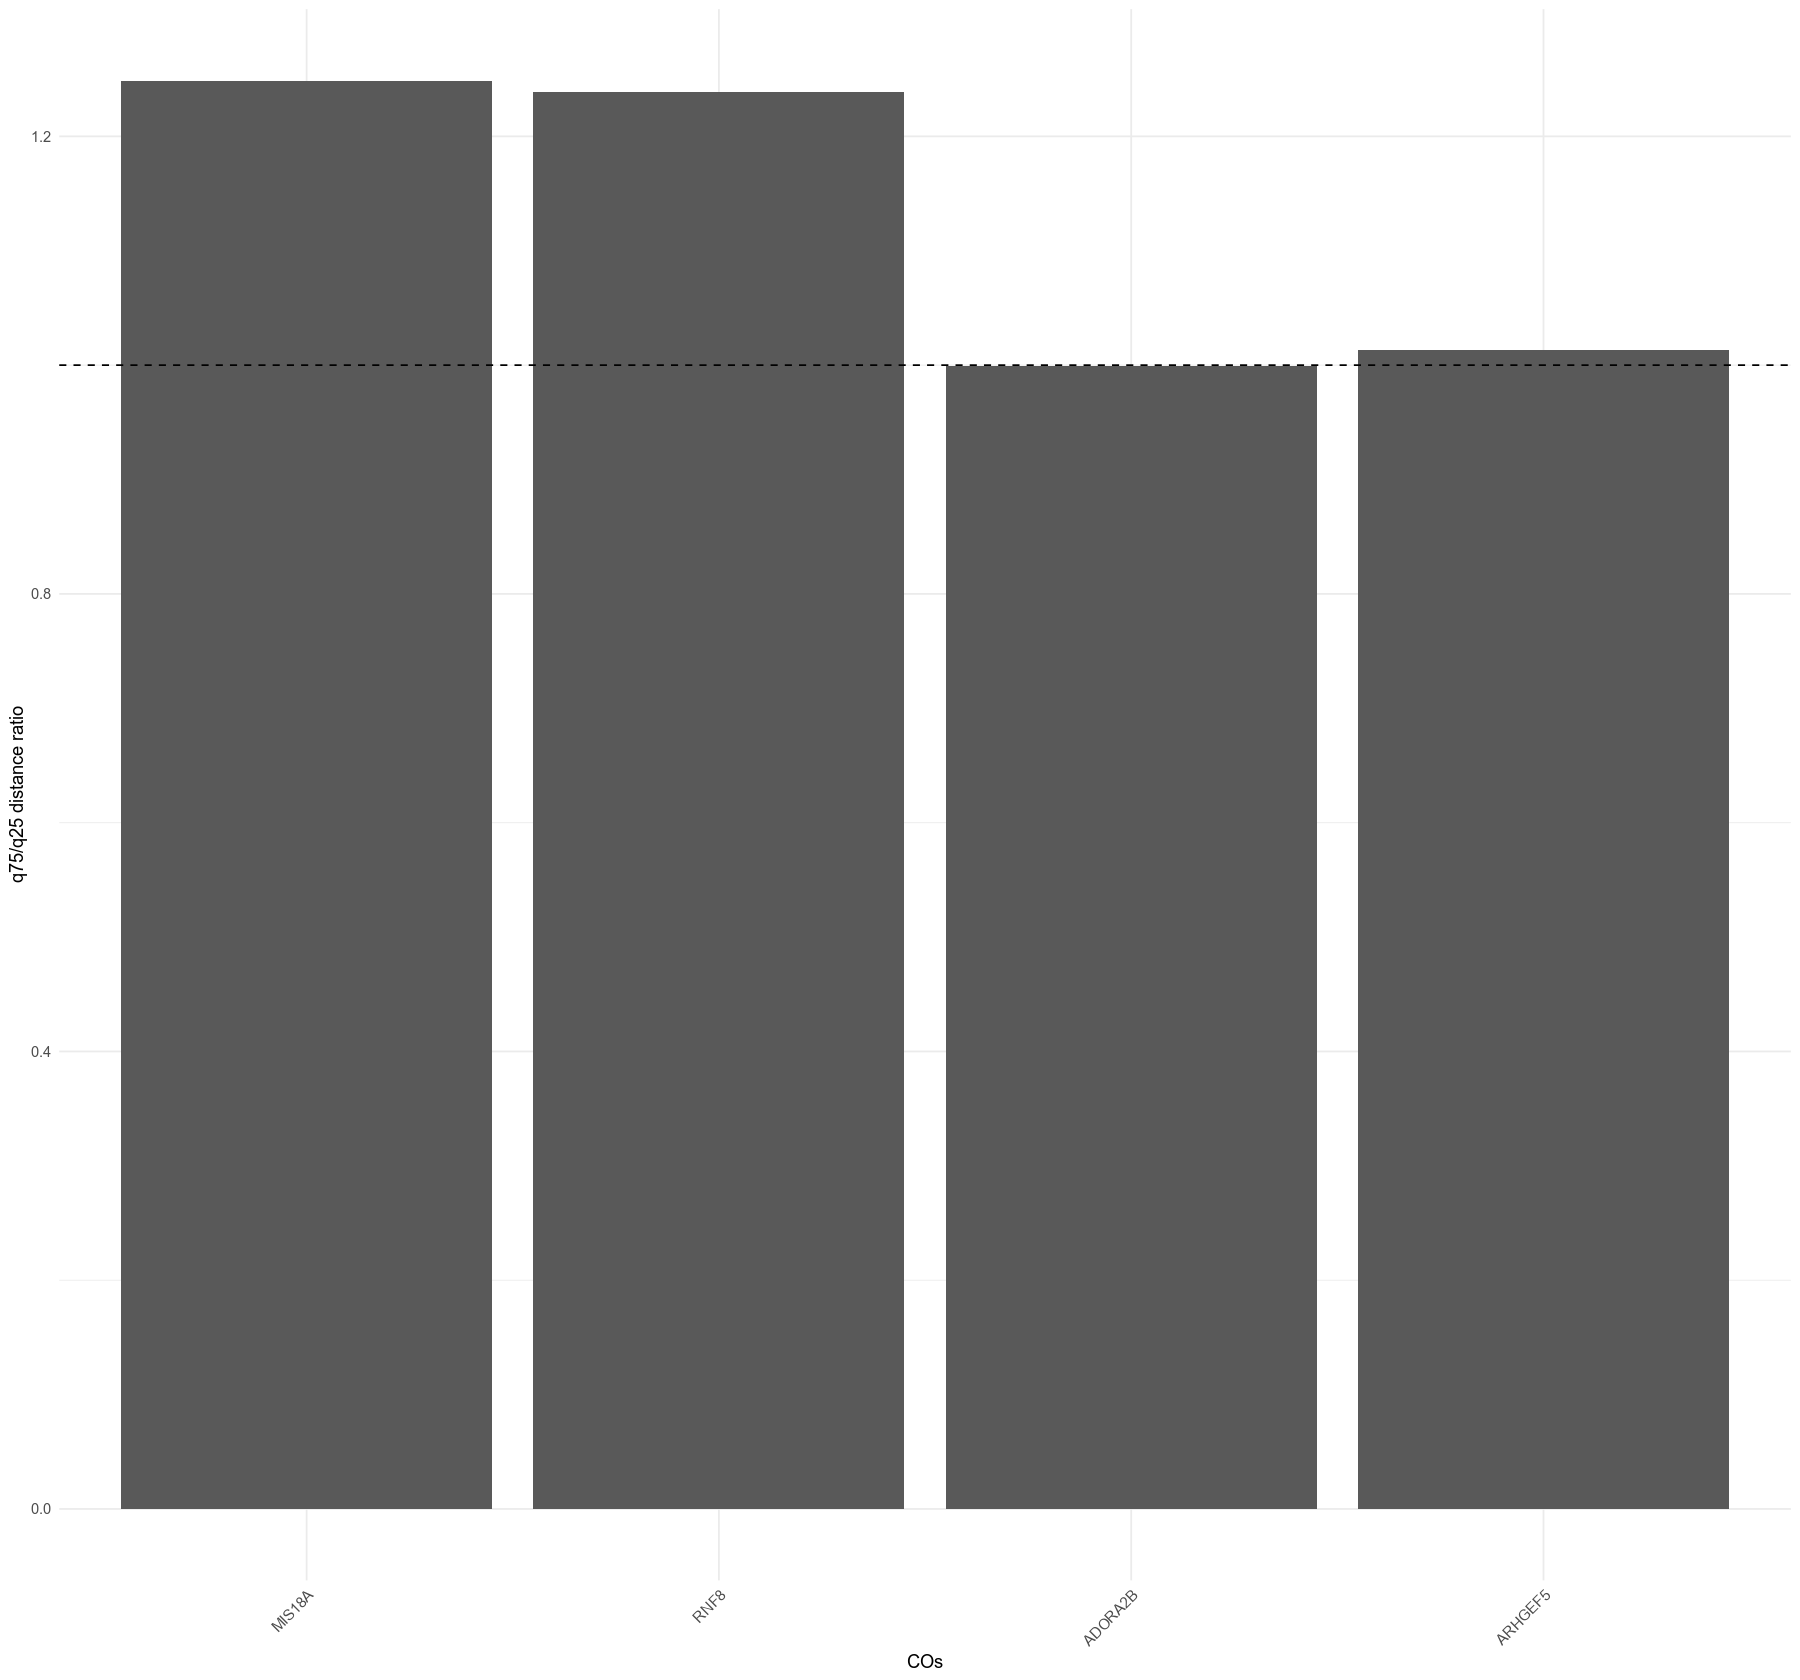

In [10]:
genes_to_graph = c('MIS18A', 'RNF8', 'ADORA2B', 'ARHGEF5')

cluster_distances_PCA_all_genes_q25_q75[genes_to_graph,] -> PC_distances_select

PC_distances_select <- pivot_longer(PC_distances_select, names_to = 'Pctile', values_to = 'distance', cols = ends_with('pctile'))
PC_distances_select$Pctile = factor(PC_distances_select$Pctile, levels = c('lower_pctile', 'higher_pctile'))
PC_distances_select$COs = factor(PC_distances_select$COs, levels = genes_to_graph)

PC_distances_select = PC_distances_select %>% select(COs, high_to_low_ratio) %>% distinct(COs, high_to_low_ratio, .keep_all = TRUE)
ggplot(PC_distances_select, aes(COs, high_to_low_ratio)) + ylab('q75/q25 distance ratio') +
  geom_bar(stat="identity", position=position_dodge()) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + geom_hline(yintercept = 1, linetype = 'dashed')

### show sina plot of distances for 6 genes + all Brian's hits
## later on recalculate the distance metric using say the top 5 PCs or so to get
## better separation in this sina plot
distances_final_q25_q75_PCA_all_genes[genes_to_graph] -> selected_gene_distances
lowers_select <- lapply(selected_gene_distances, '[[', 1)
uppers_select <- lapply(selected_gene_distances, '[[', 2)
lapply(genes_to_graph, rep, length(lowers_select[[1]])) -> tmp
grps <- unlist(tmp)
PCA_q25_q75_sina_df_select <- data.frame(Grouping_gene = grps, Pctile = c(rep('q25', length(unlist(lowers_select))), rep('q75', length(unlist(uppers_select)))), Distance_from_centroid = c(unlist(lowers_select), unlist(uppers_select)))
PCA_q25_q75_sina_df_select$Grouping_gene = factor(PCA_q25_q75_sina_df_select$Grouping_gene, levels = genes_to_graph)

saveRDS(PCA_q25_q75_sina_df_select, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/PCA_q25_q75_sina_df_select.rds')

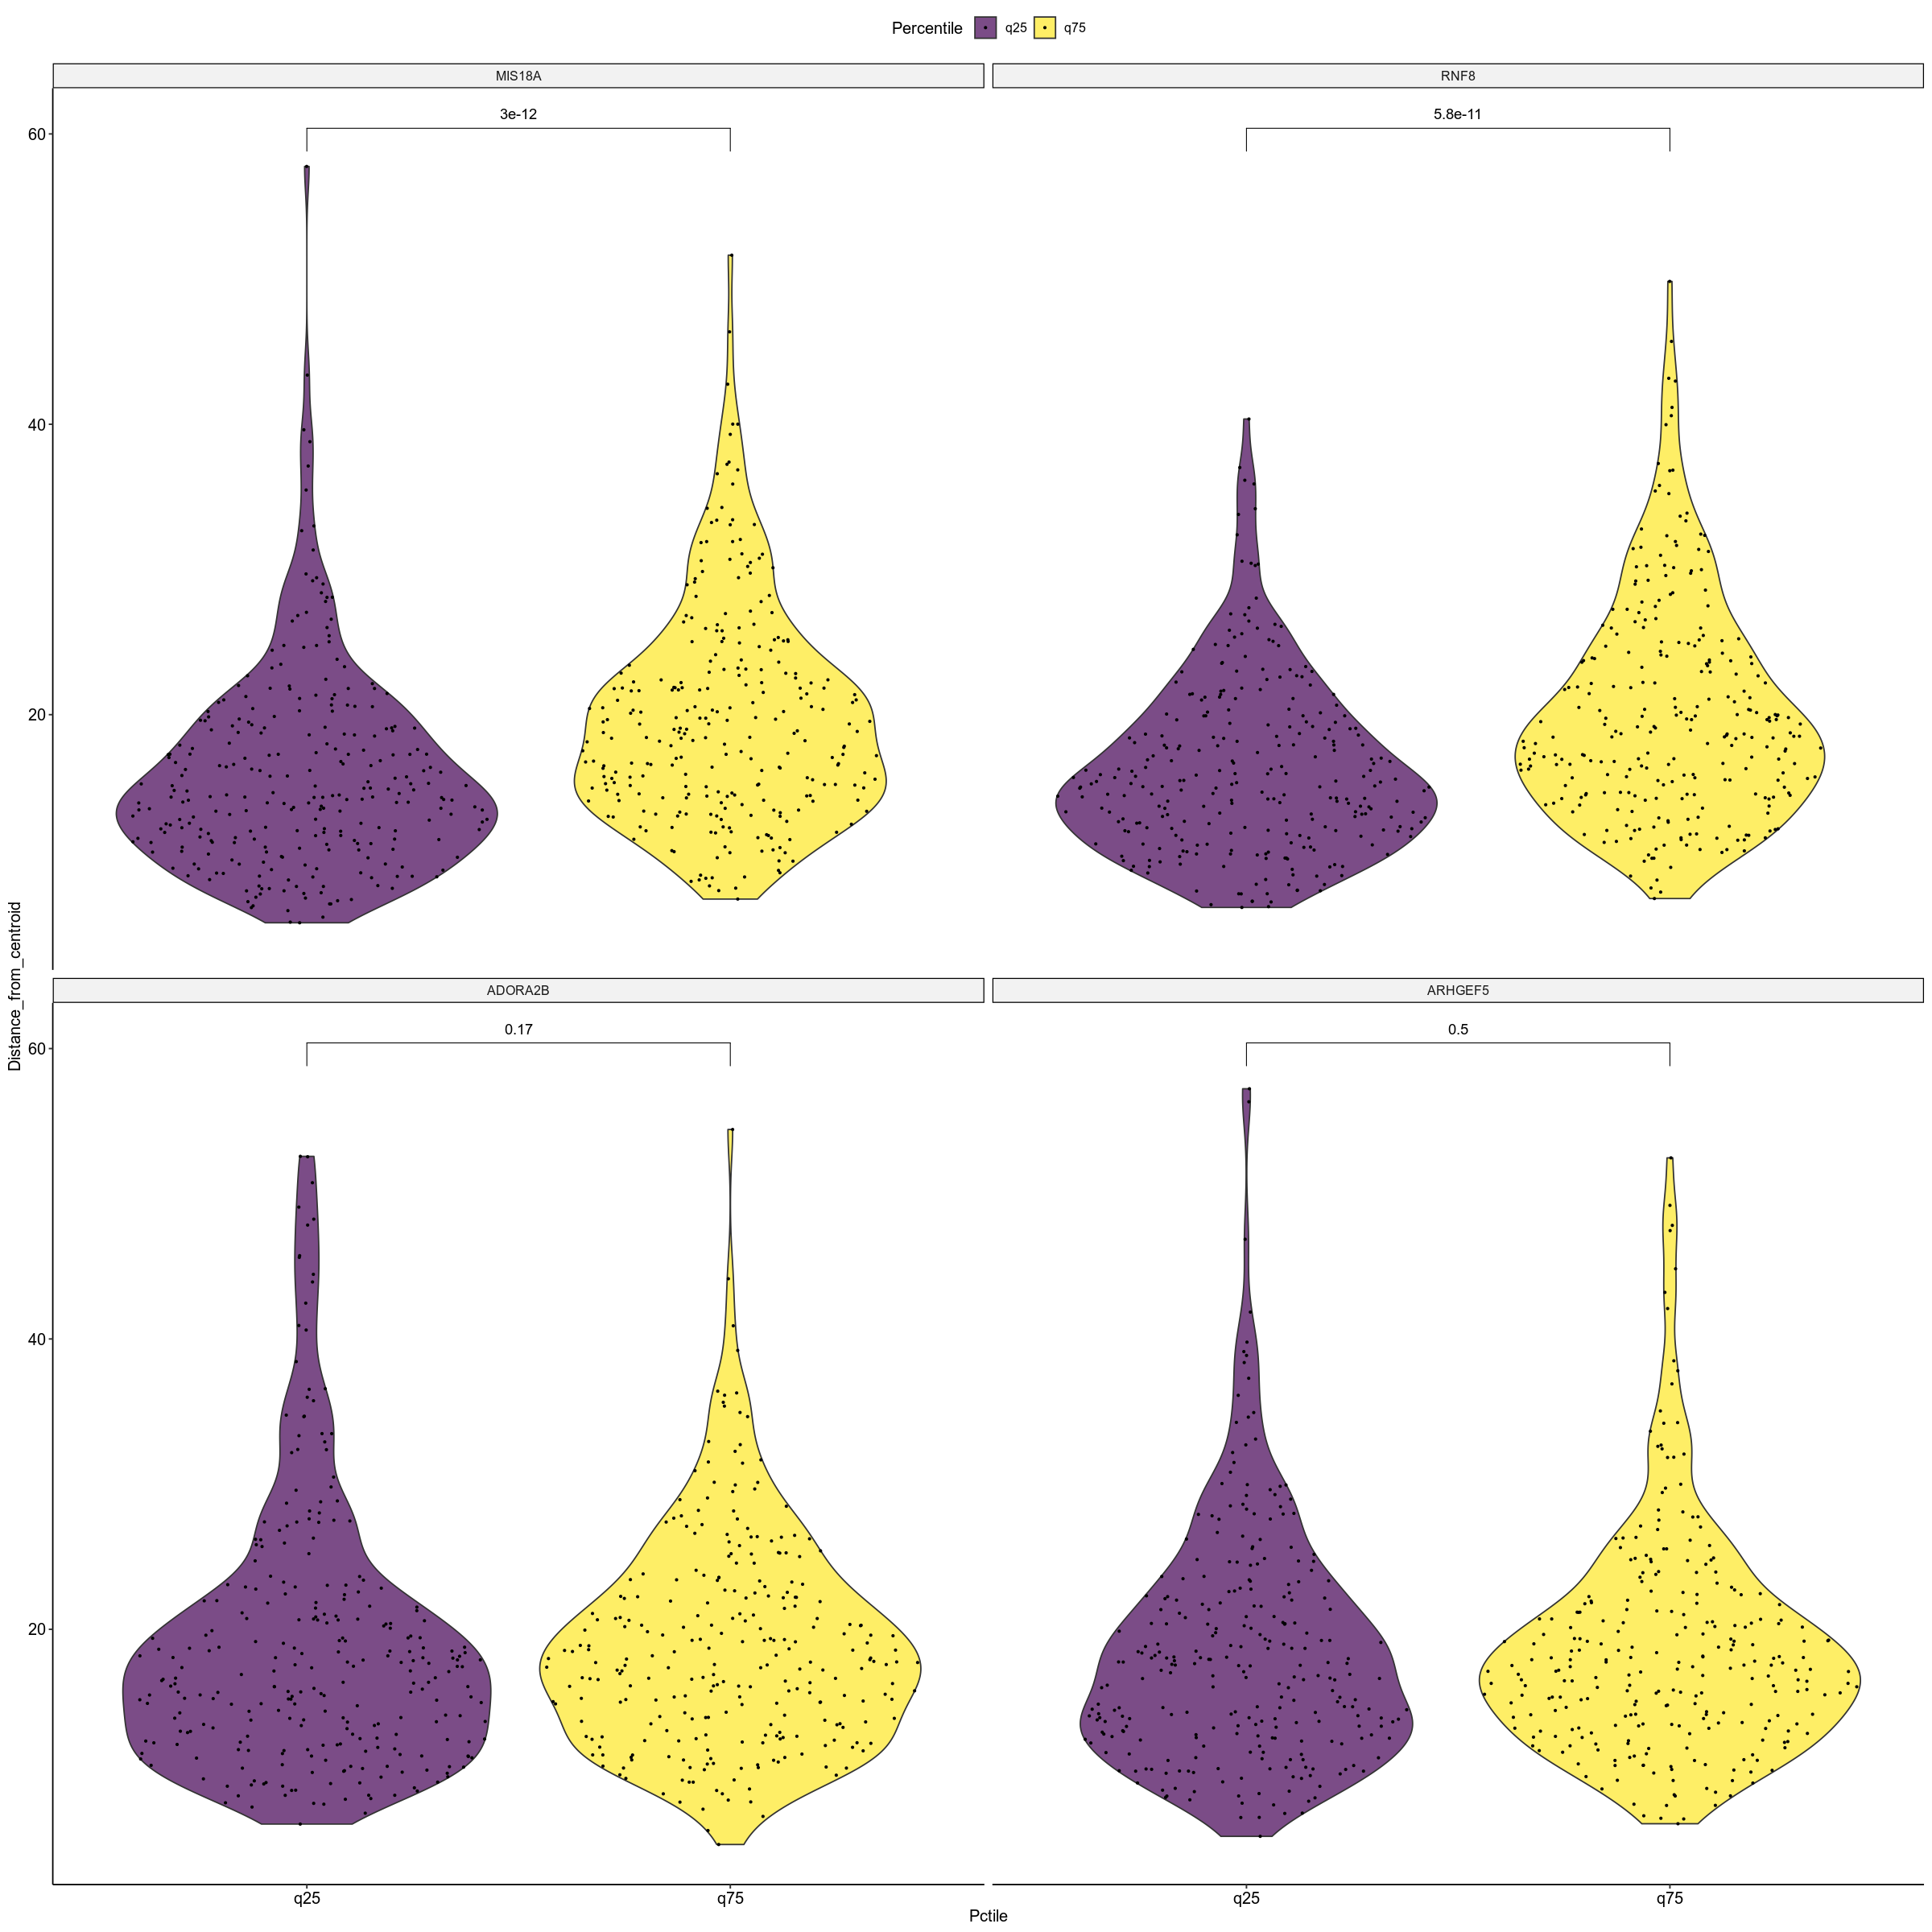

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(PCA_q25_q75_sina_df_select, aes(x = Pctile, y = Distance_from_centroid, fill = Pctile)) + geom_violin(position=position_dodge()) + 
  geom_sina(position=position_dodge(), size = 0.5) + scale_fill_viridis_d(alpha = 0.7, name = 'Percentile') +
  facet_wrap(~Grouping_gene) +
  stat_compare_means(comparisons = list(c('q25', 'q75'))) + theme_pubr()

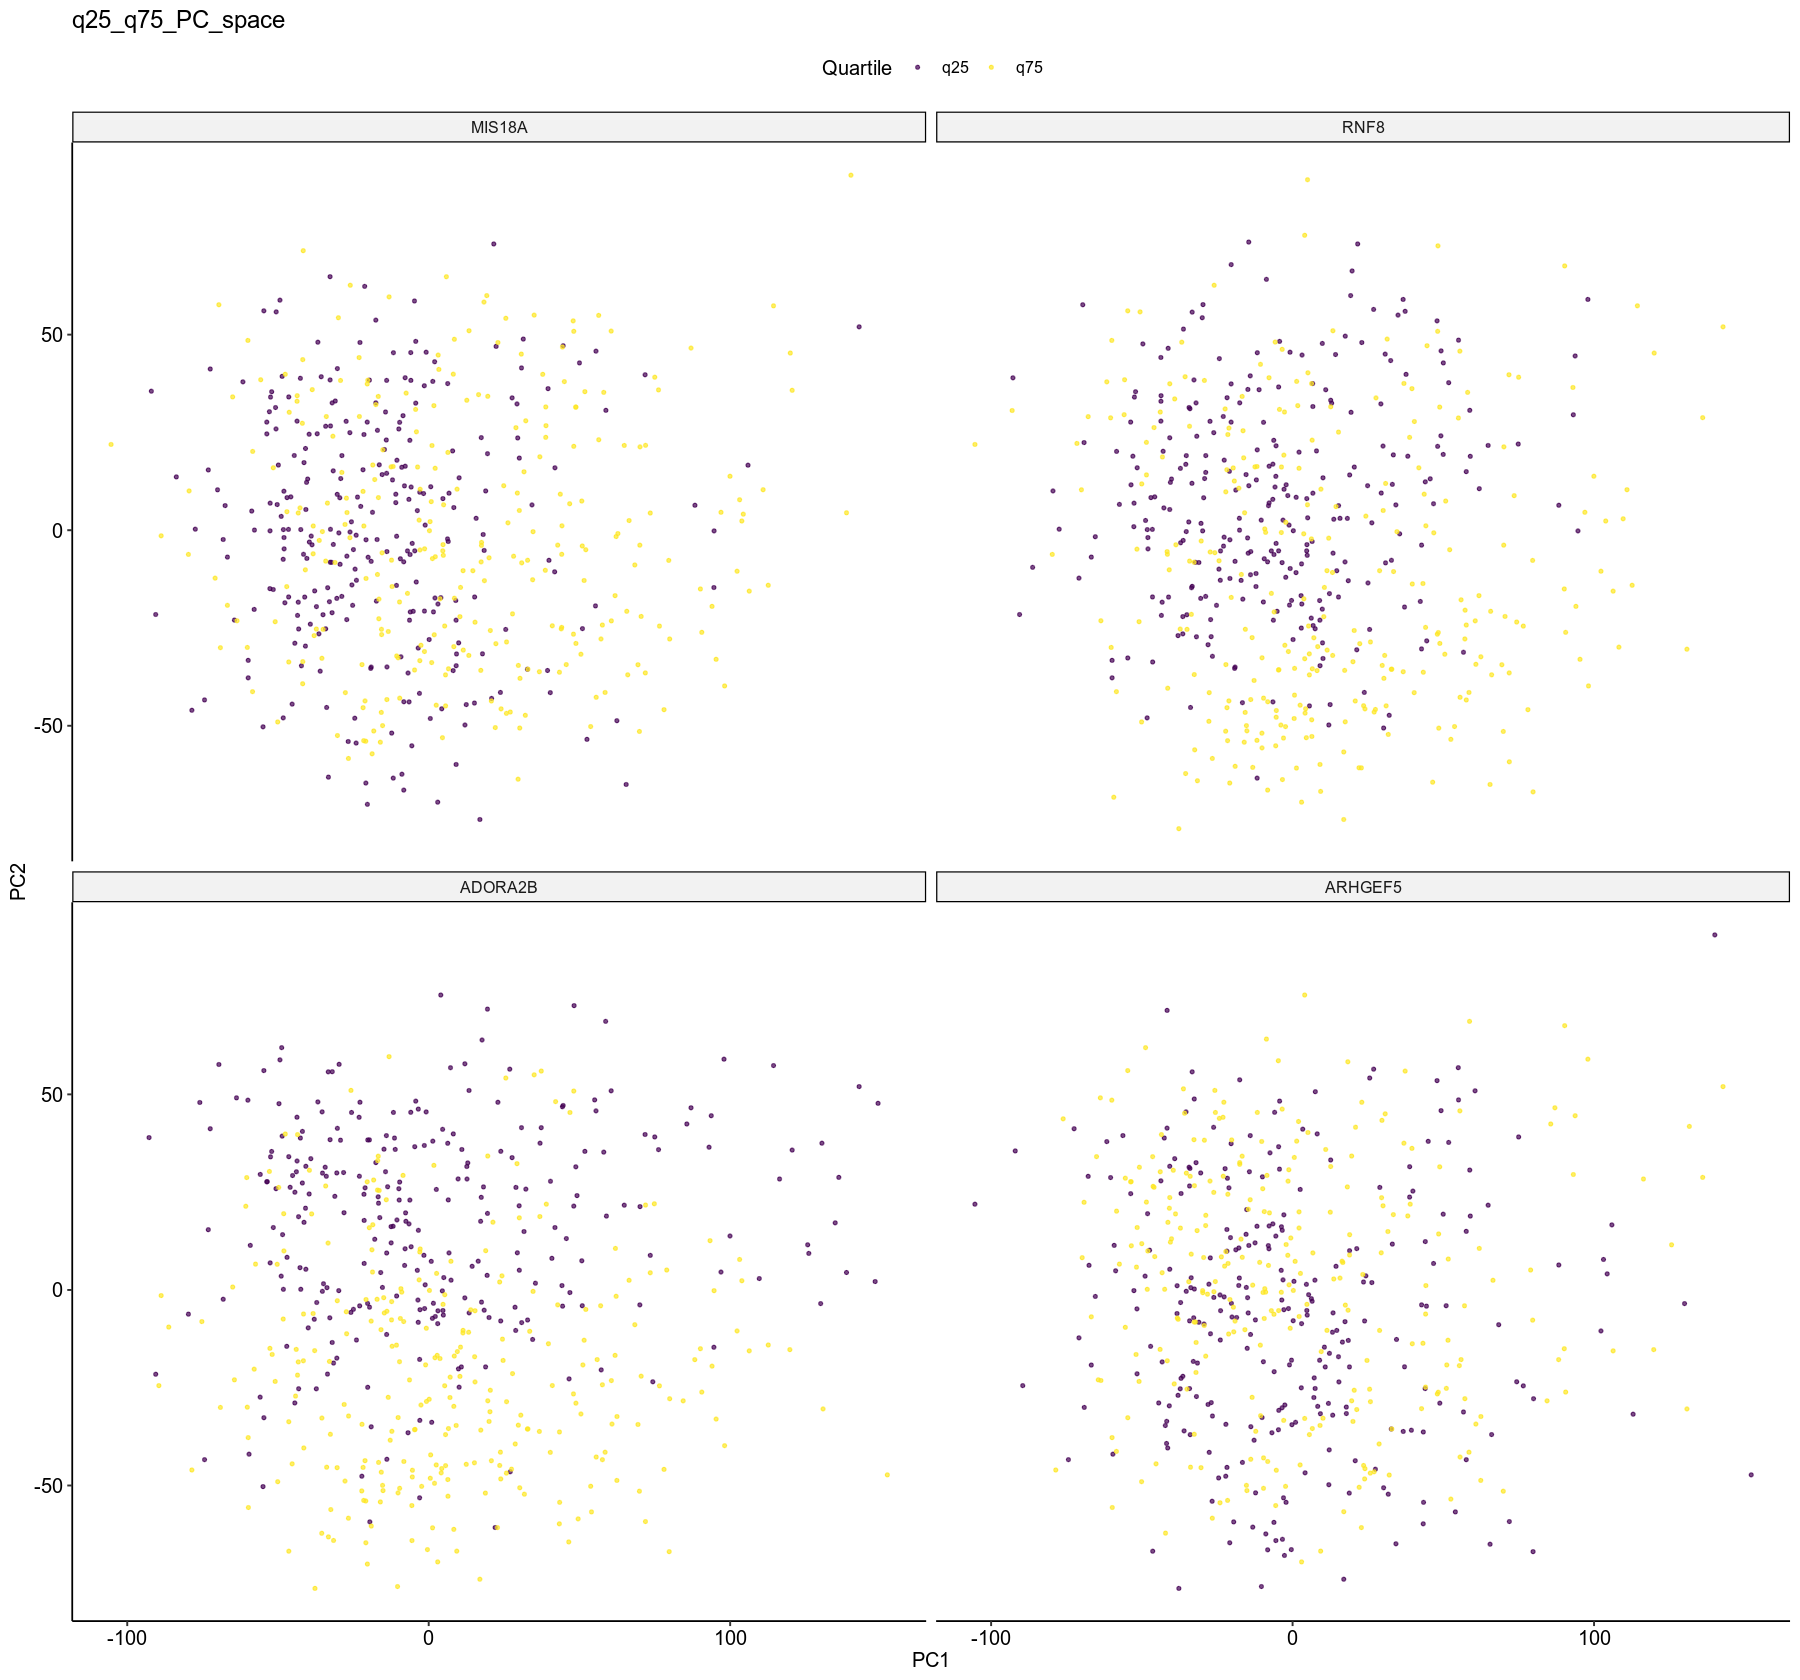

In [ ]:
options(repr.plot.width=15, repr.plot.height=14)

## q25 vs q75 graphs in PCA space
lowers <- lapply(grouped_dataframes_list_PCA_q25_q75_all_genes, '[[', 3)
uppers <- lapply(grouped_dataframes_list_PCA_q25_q75_all_genes, '[[', 4)
lowers_select <- lowers[genes_to_graph]
uppers_select <- uppers[genes_to_graph]
lowers_select <- lapply(lowers_select, t)
uppers_select <- lapply(uppers_select, t)
lowers_select <- lapply(lowers_select, as.data.frame)
uppers_select <- lapply(uppers_select, as.data.frame)
lowers_select <- lapply(lowers_select, select, PC1, PC2)
uppers_select <- lapply(uppers_select, select, PC1, PC2)
lowers_select <- lapply(lowers_select, mutate, Quartile = 'q25')
uppers_select <- lapply(uppers_select, mutate, Quartile = 'q75')
combined <- mapply(rbind, lowers_select, uppers_select, SIMPLIFY = FALSE)
q25_q75_PCA_df_select <- bind_rows(combined, .id = 'Grouping_gene')
q25_q75_PCA_df_select$Grouping_gene = factor(q25_q75_PCA_df_select$Grouping_gene, levels = genes_to_graph)

saveRDS(q25_q75_PCA_df_select, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/q25_q75_PCA_df_select.rds')

ggplot(q25_q75_PCA_df_select, aes(PC1, PC2, color = Quartile)) + geom_point(alpha = 0.7, size = 0.8) + scale_color_viridis_d() + facet_wrap(~Grouping_gene) + theme_pubr() +
  ggtitle('q25_q75_PC_space') 

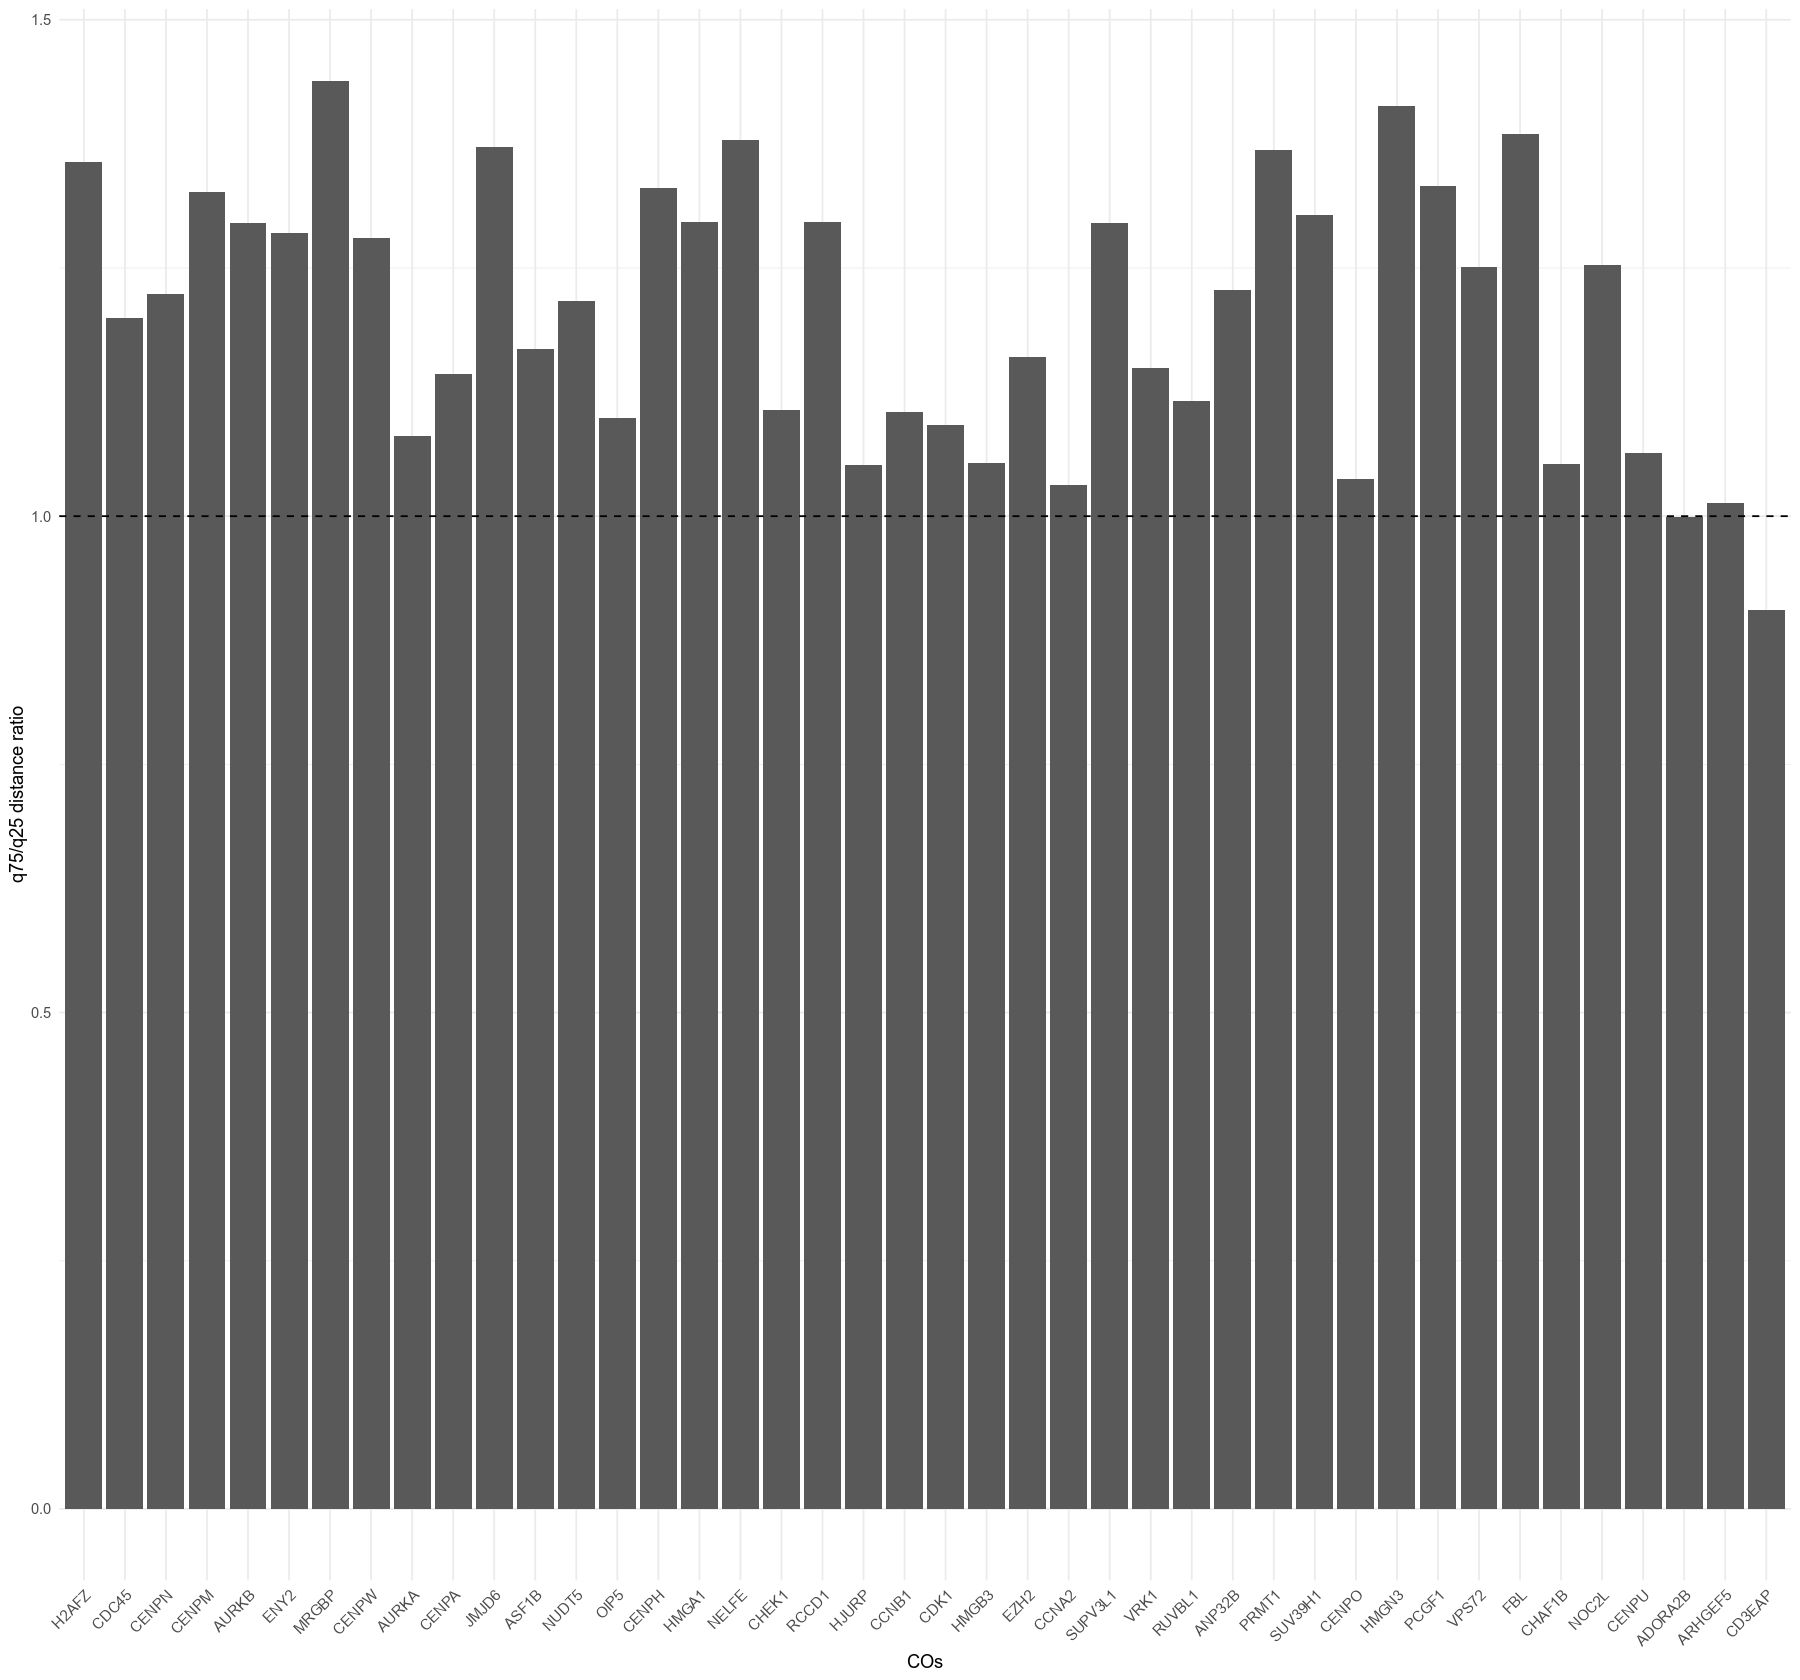

In [ ]:
genes_to_graph = c(setdiff(intersected_CO_genes, c('MIS18A', 'RNF8')), 'ADORA2B', 'ARHGEF5', 'CD3EAP')
cluster_distances_PCA_all_genes_q25_q75[genes_to_graph,] -> PC_distances_select

PC_distances_select <- pivot_longer(PC_distances_select, names_to = 'Pctile', values_to = 'distance', cols = ends_with('pctile'))
PC_distances_select$Pctile = factor(PC_distances_select$Pctile, levels = c('lower_pctile', 'higher_pctile'))
PC_distances_select$COs = factor(PC_distances_select$COs, levels = genes_to_graph)

PC_distances_select = PC_distances_select %>% select(COs, high_to_low_ratio) %>% distinct(COs, high_to_low_ratio, .keep_all = TRUE)
ggplot(PC_distances_select, aes(COs, high_to_low_ratio)) + ylab('q75/q25 distance ratio') +
  geom_bar(stat="identity", position=position_dodge()) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + geom_hline(yintercept = 1, linetype = 'dashed')

### show sina plot of distances for 6 genes + all Brian's hits
## later on recalculate the distance metric using say the top 5 PCs or so to get
## better separation in this sina plot
distances_final_q25_q75_PCA_all_genes[genes_to_graph] -> selected_gene_distances
lowers_select <- lapply(selected_gene_distances, '[[', 1)
uppers_select <- lapply(selected_gene_distances, '[[', 2)
lapply(genes_to_graph, rep, length(lowers_select[[1]])) -> tmp
grps <- unlist(tmp)
PCA_q25_q75_sina_df_select <- data.frame(Grouping_gene = grps, Pctile = c(rep('q25', length(unlist(lowers_select))), rep('q75', length(unlist(uppers_select)))), Distance_from_centroid = c(unlist(lowers_select), unlist(uppers_select)))
PCA_q25_q75_sina_df_select$Grouping_gene = factor(PCA_q25_q75_sina_df_select$Grouping_gene, levels = genes_to_graph)

saveRDS(PCA_q25_q75_sina_df_select, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/PCA_q25_q75_sina_df_supplemental.rds')

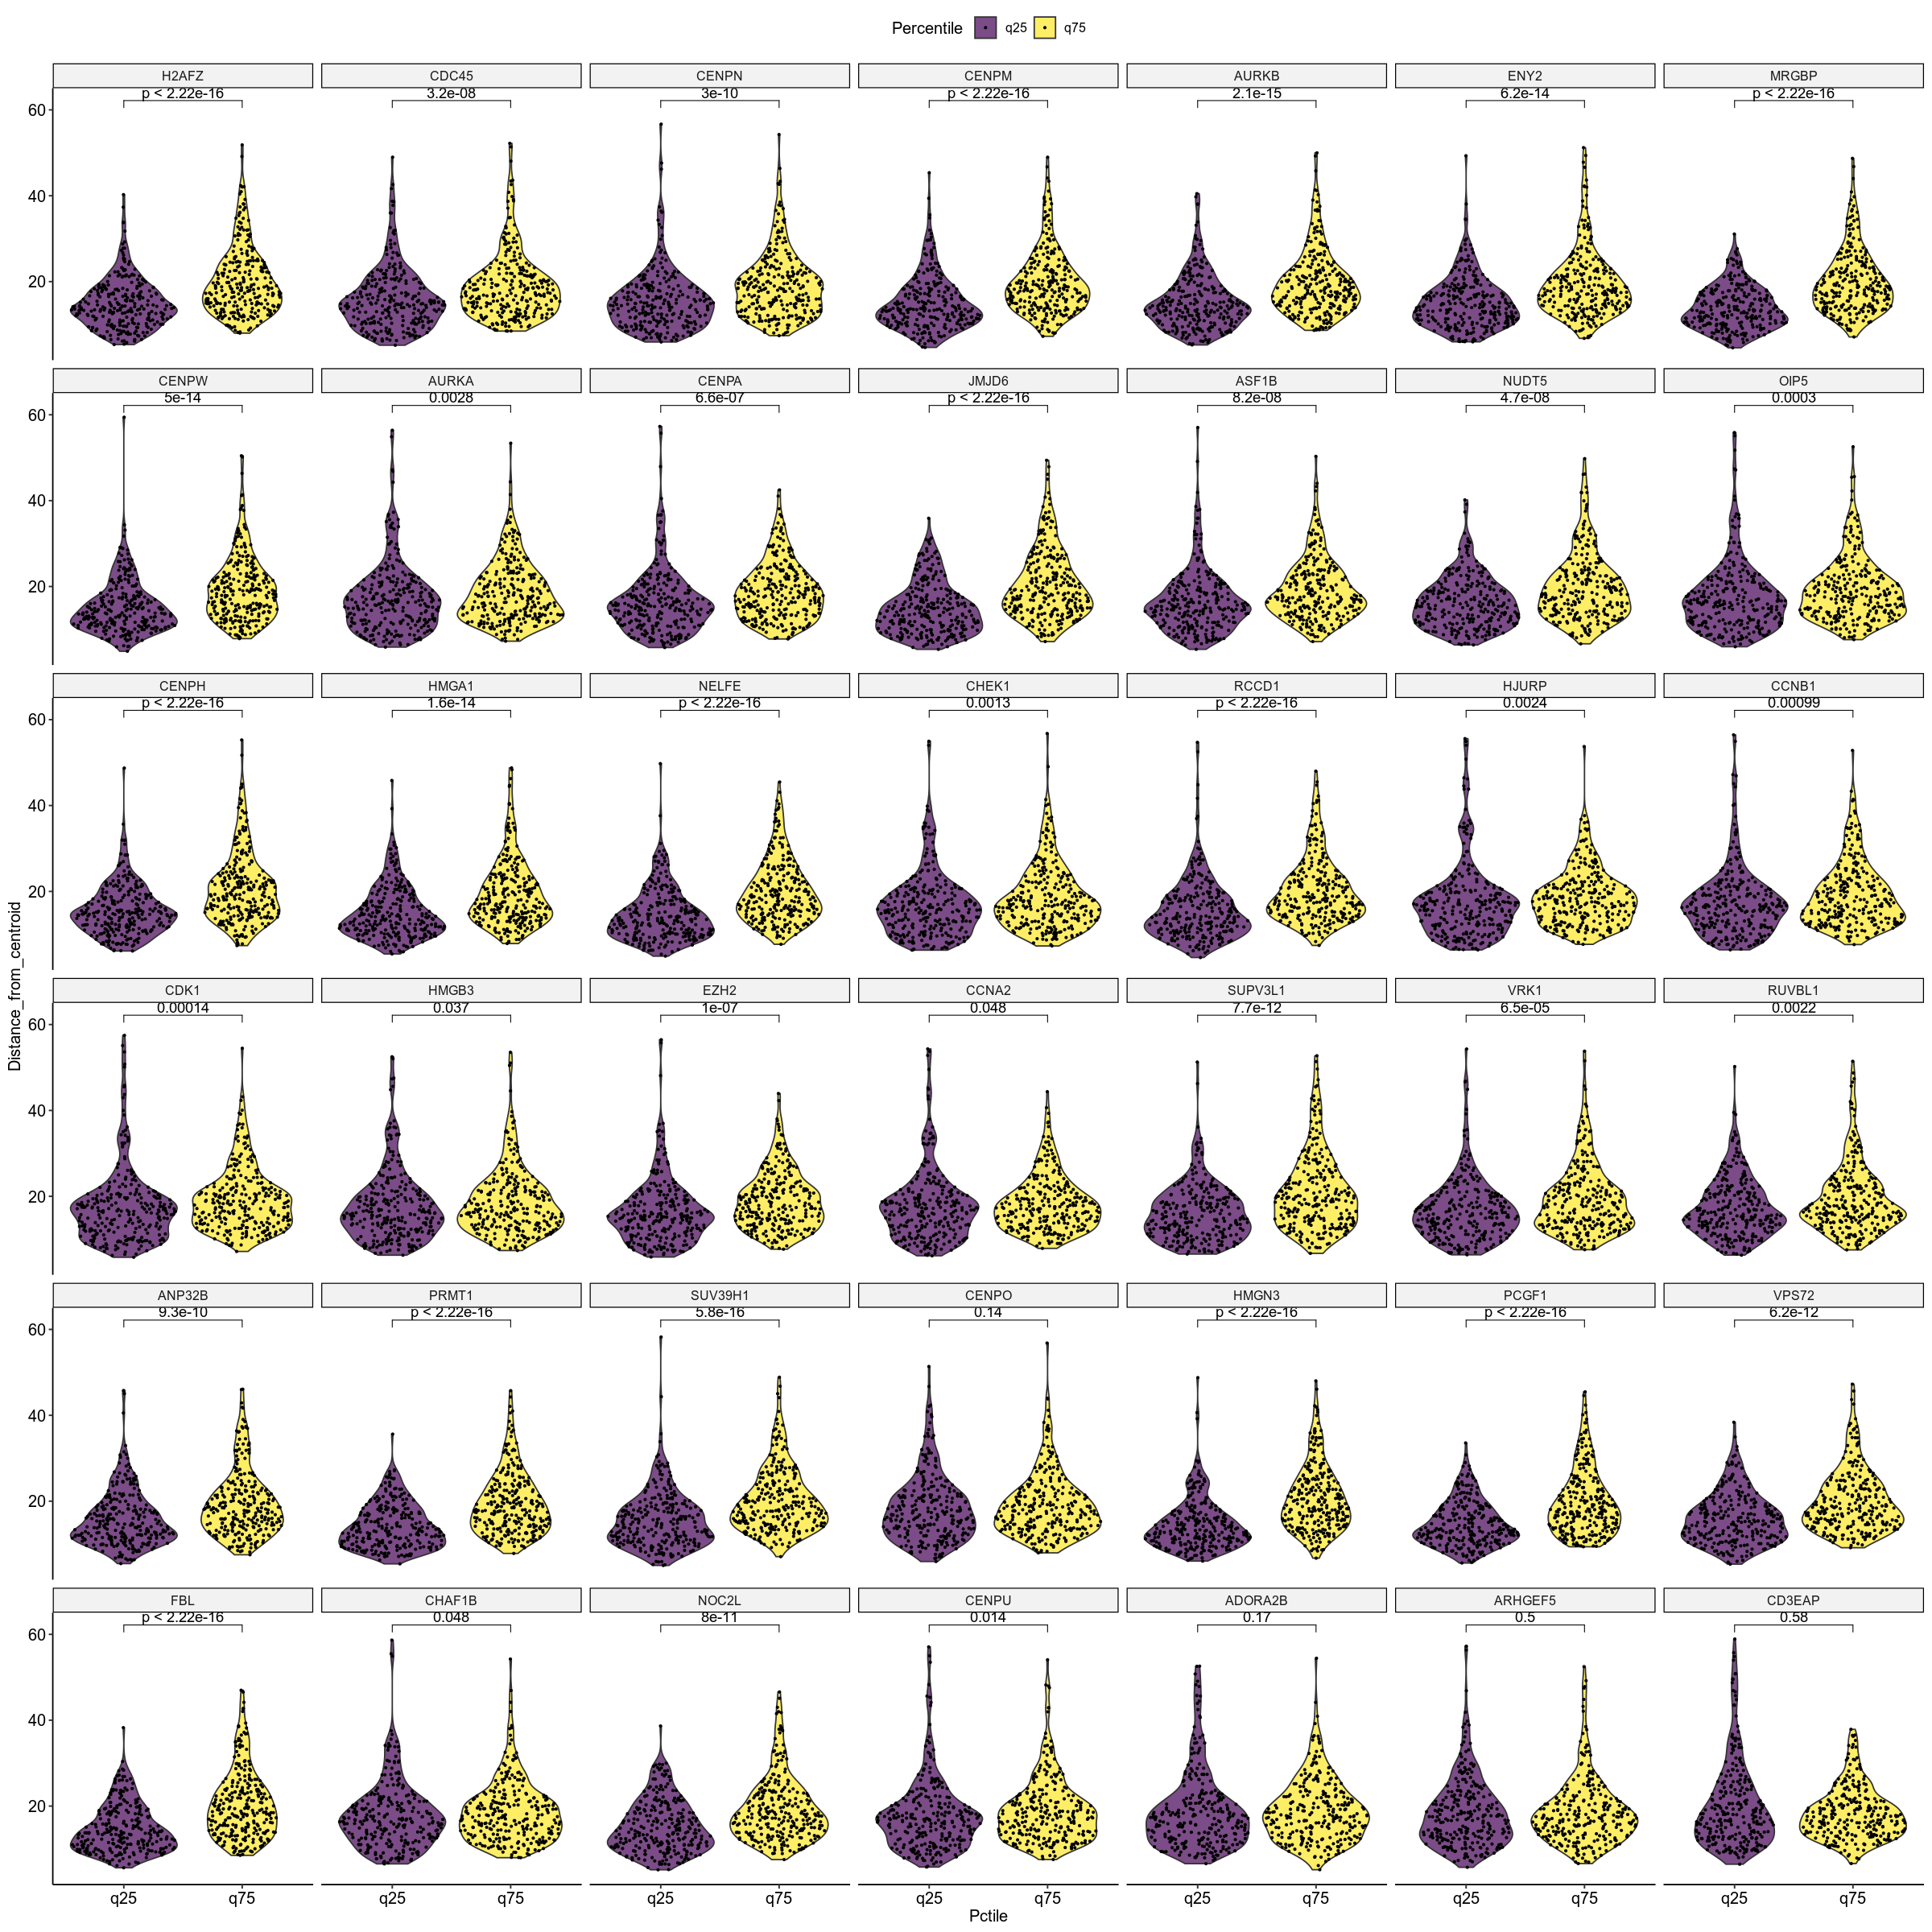

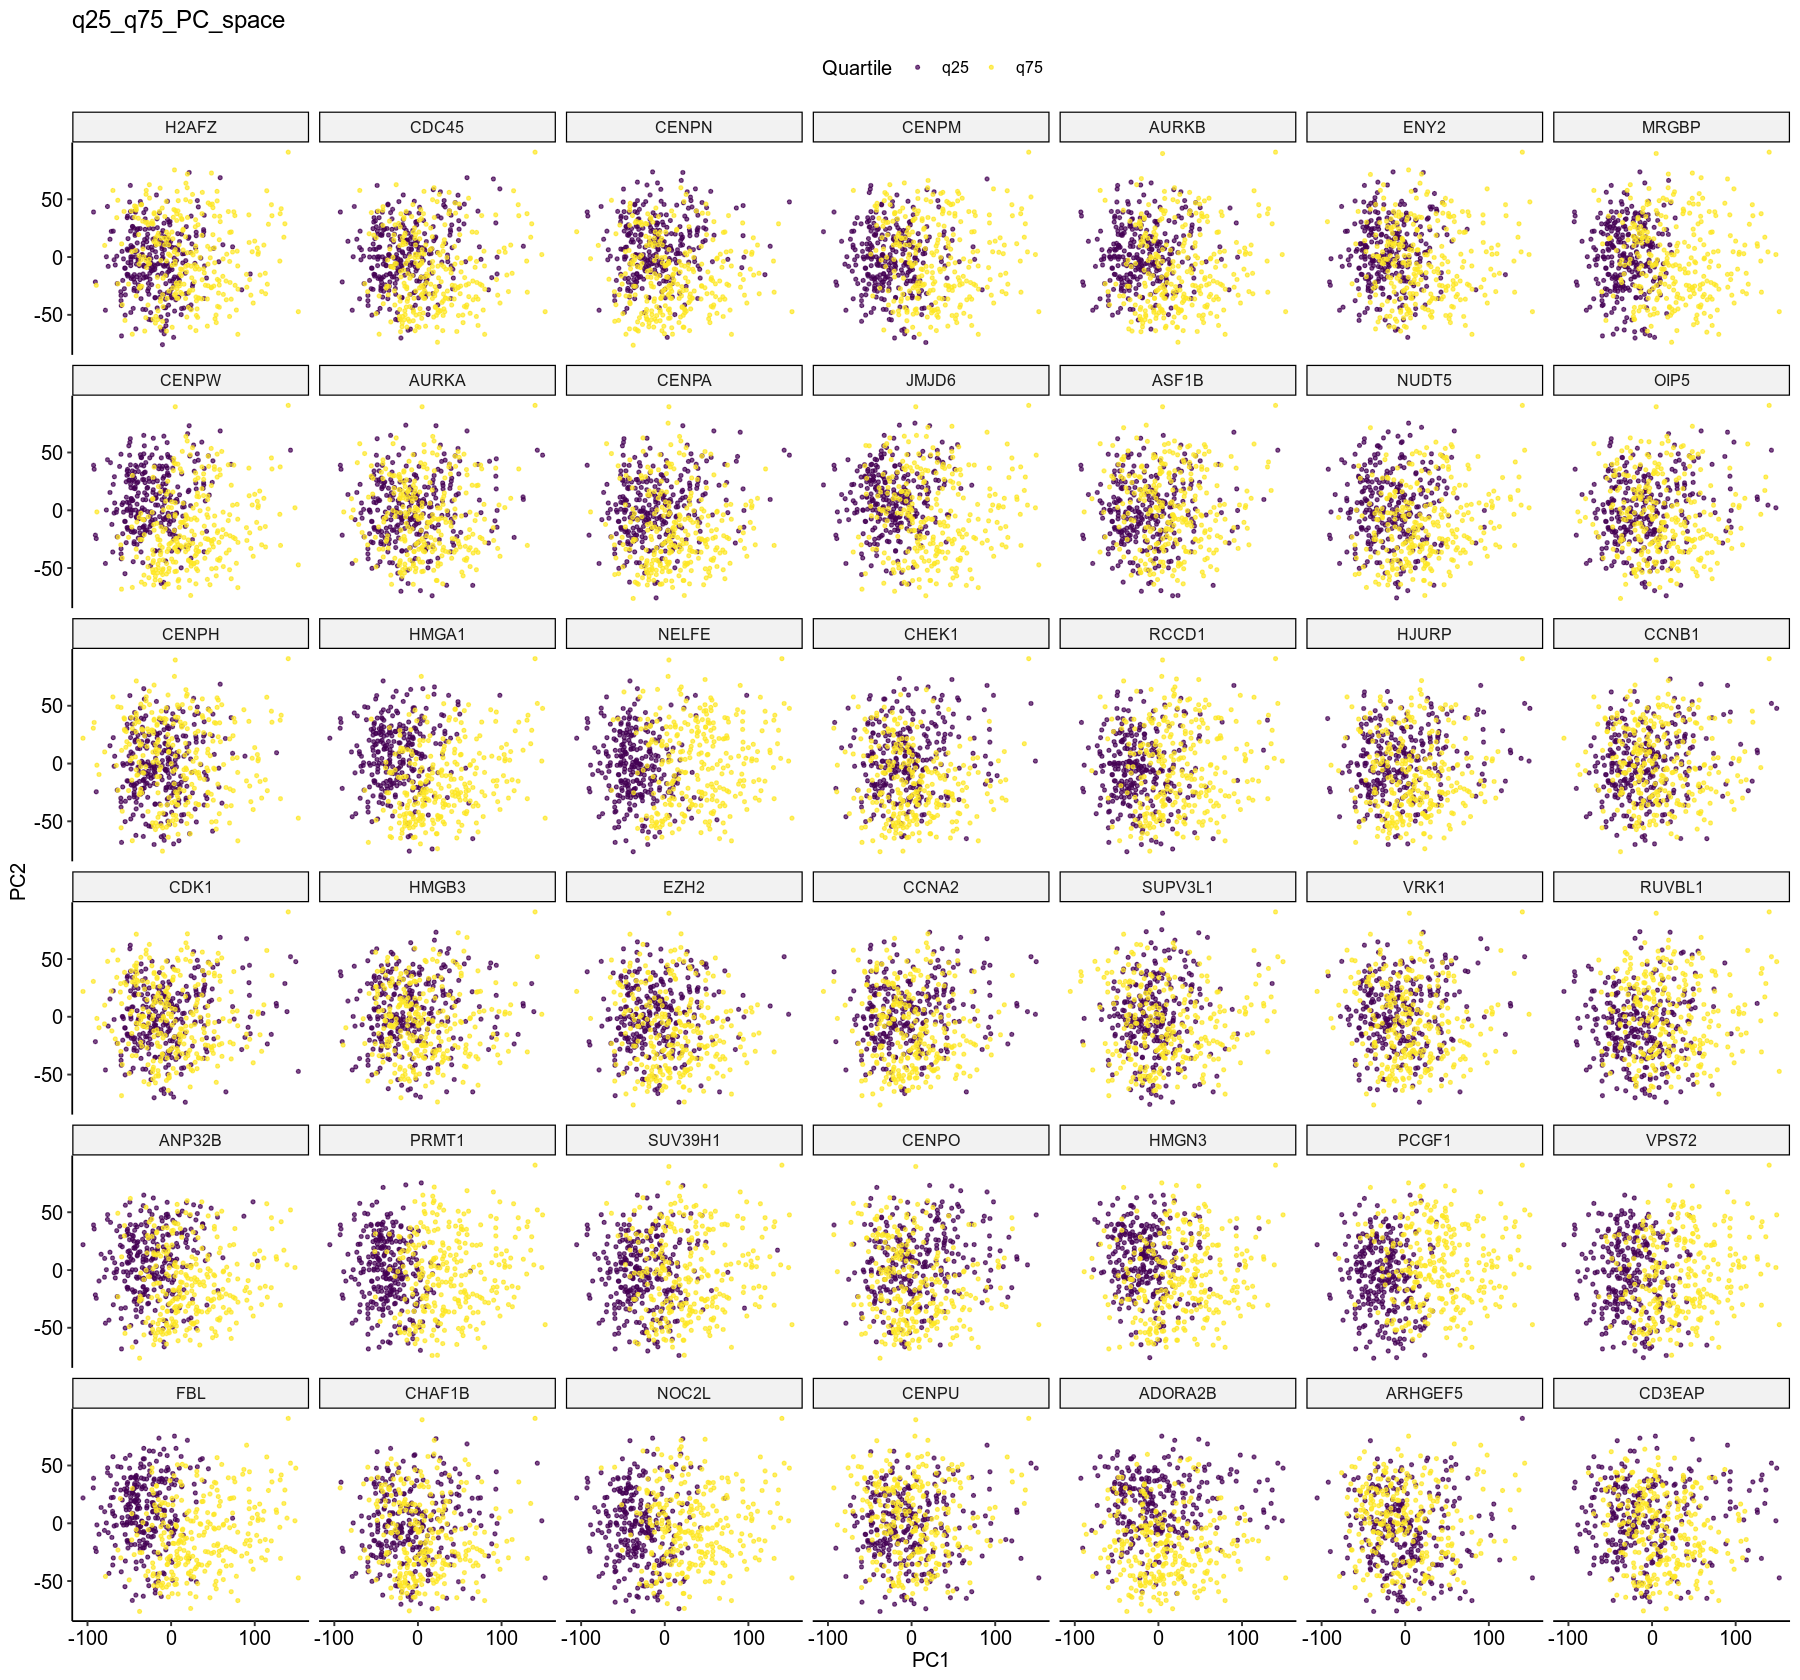

In [13]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(PCA_q25_q75_sina_df_select, aes(x = Pctile, y = Distance_from_centroid, fill = Pctile)) + geom_violin(position=position_dodge()) + 
  geom_sina(position=position_dodge(), size = 0.5) + scale_fill_viridis_d(alpha = 0.7, name = 'Percentile') +
  facet_wrap(~Grouping_gene) +
  stat_compare_means(comparisons = list(c('q25', 'q75'))) + theme_pubr()


options(repr.plot.width=15, repr.plot.height=14)

## q25 vs q75 graphs in PCA space
lowers <- lapply(grouped_dataframes_list_PCA_q25_q75_all_genes, '[[', 3)
uppers <- lapply(grouped_dataframes_list_PCA_q25_q75_all_genes, '[[', 4)
lowers_select <- lowers[genes_to_graph]
uppers_select <- uppers[genes_to_graph]
lowers_select <- lapply(lowers_select, t)
uppers_select <- lapply(uppers_select, t)
lowers_select <- lapply(lowers_select, as.data.frame)
uppers_select <- lapply(uppers_select, as.data.frame)
lowers_select <- lapply(lowers_select, select, PC1, PC2)
uppers_select <- lapply(uppers_select, select, PC1, PC2)
lowers_select <- lapply(lowers_select, mutate, Quartile = 'q25')
uppers_select <- lapply(uppers_select, mutate, Quartile = 'q75')
combined <- mapply(rbind, lowers_select, uppers_select, SIMPLIFY = FALSE)
q25_q75_PCA_df_select <- bind_rows(combined, .id = 'Grouping_gene')
q25_q75_PCA_df_select$Grouping_gene = factor(q25_q75_PCA_df_select$Grouping_gene, levels = genes_to_graph)

saveRDS(q25_q75_PCA_df_select, '/home/ssobti/projects/heterogeneity_brian/fig_output/data/fig1/q25_q75_PCA_df_supplemental.rds')

ggplot(q25_q75_PCA_df_select, aes(PC1, PC2, color = Quartile)) + geom_point(alpha = 0.7, size = 0.8) + scale_color_viridis_d() + facet_wrap(~Grouping_gene) + theme_pubr() +
  ggtitle('q25_q75_PC_space') 